In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns


### Loading Data and Data Augmentation

In [ ]:
data_dir = "dataset"
train_dir = f"{data_dir}/train"
test_dir = f"{data_dir}/test"


datagen = ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=20,
    validation_split=0.2
)
datagen_test = ImageDataGenerator(rescale=1.0/255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_data = datagen_test.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 2165 images belonging to 3 classes.
Found 539 images belonging to 3 classes.
Found 301 images belonging to 3 classes.


### Defining the Model

In [ ]:

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  


model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')  
])


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,371 (90.98 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

### Training before Fine Tuning

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',   
    patience=5,            
    restore_best_weights=True  
)

print("\nStarting initial training...")


history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30, 
    validation_steps=len(val_data),
    steps_per_epoch=len(train_data),
    callbacks=[early_stopping] 
)



Starting initial training...


C:\Users\rulas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.3765 - loss: 1.0961 - val_accuracy: 0.6197 - val_loss: 1.0015
Epoch 2/30


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/30


C:\Users\rulas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.4842 - loss: 1.0142 - val_accuracy: 0.5714 - val_loss: 0.9633
Epoch 4/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.5711 - loss: 0.9621 - val_accuracy: 0.6122 - val_loss: 0.9306
Epoch 6/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.6264 - loss: 0.9412 - val_accuracy: 0.6494 - val_loss: 0.8868
Epoch 8/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.6608 - loss: 0.8961 - val_accuracy: 0.6419 - val_loss: 0.8860
Epoch 10/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.6498 - loss: 0.8880 - val_accuracy: 0.7013 - val_loss: 0.8427
Epoch 

### Evaluation Before Fine Tuning

In [7]:

test_loss, test_accuracy = model.evaluate(test_data)
print(f"Initial Test Loss: {test_loss:.4f}, Initial Test Accuracy: {test_accuracy:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7463 - loss: 0.7226
Initial Test Loss: 0.7024, Initial Test Accuracy: 0.7608


### Fine Tuning, Lower Learning Rate

In [8]:

print("\nUnfreezing base model for fine-tuning...")
base_model.trainable = True


for layer in base_model.layers[:50]:  
    layer.trainable = False


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



Unfreezing base model for fine-tuning...


### Training after Fine Tuning

In [9]:

print("\nStarting fine-tuning...")
history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30, 
    validation_steps=len(val_data),
    steps_per_epoch=len(train_data)
)


Starting fine-tuning...
Epoch 1/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 481s 6s/step - accuracy: 0.3656 - loss: 6.1404 - val_accuracy: 0.2931 - val_loss: 5.1092
Epoch 2/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 432s 6s/step - accuracy: 0.7106 - loss: 0.8532 - val_accuracy: 0.2913 - val_loss: 5.9981
Epoch 4/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 401s 6s/step - accuracy: 0.7876 - loss: 0.5241 - val_accuracy: 0.2894 - val_loss: 5.2550
Epoch 6/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 435s 6s/step - accuracy: 0.8210 - loss: 0.4473 - val_accuracy: 0.2931 - val_loss: 4.7505
Epoch 8/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 454s 7s/step - accuracy: 0.8403 - loss: 0.3753 - val_accu

### Evaluation after Fine Tuning

In [10]:

test_loss_finetune, test_accuracy_finetune = model.evaluate(test_data)
print(f"Fine-Tuned Test Loss: {test_loss_finetune:.4f}, Fine-Tuned Test Accuracy: {test_accuracy_finetune:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8890 - loss: 0.2770
Fine-Tuned Test Loss: 0.2467, Fine-Tuned Test Accuracy: 0.8904


In [11]:
model.save("resnet_solar_panels_tf_finetuned.h5")
print("Fine-tuning complete. Model saved as 'resnet_solar_panels_tf_finetuned.h5'.")

Fine-tuning complete. Model saved as 'resnet_solar_panels_tf_finetuned.h5'.


### Confusion Matrix

10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step 


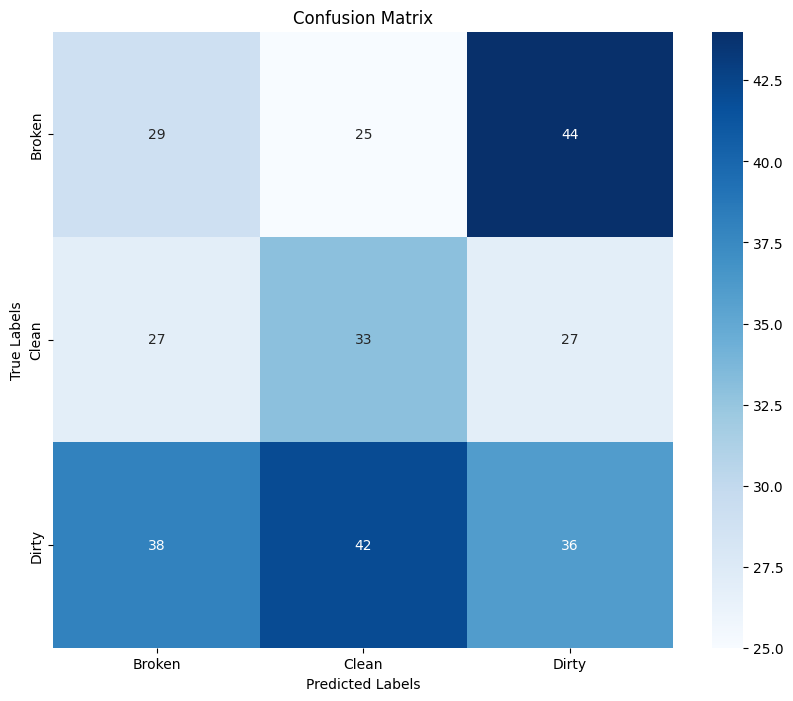

In [12]:
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

class_labels = list(test_data.class_indices.keys())

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### F1 Score, Precision, Recall

In [14]:
from sklearn.metrics import classification_report, f1_score

y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

f1 = f1_score(y_true, y_pred_classes, average="weighted")
print(f"F1 Score: {f1}")

class_names = list(test_data.class_indices.keys())
class_report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:\n", class_report)

10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step
F1 Score: 0.36691104071773095
Classification Report:
               precision    recall  f1-score   support

      Broken       0.38      0.37      0.38        98
       Clean       0.30      0.34      0.32        87
       Dirty       0.41      0.38      0.39       116

    accuracy                           0.37       301
   macro avg       0.36      0.36      0.36       301
weighted avg       0.37      0.37      0.37       301



### ROC Curve

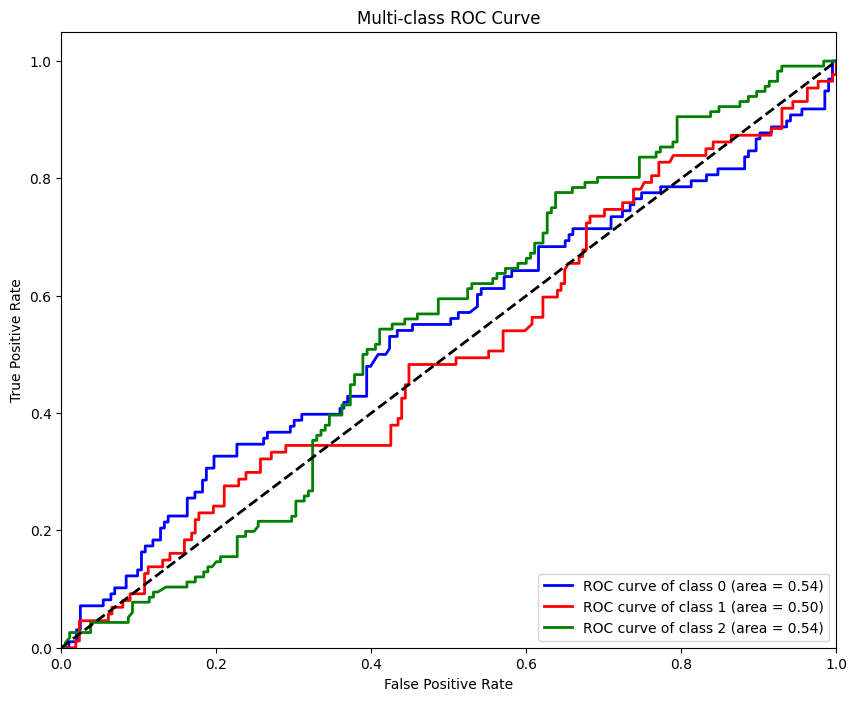

In [15]:
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical
from itertools import cycle


y_true = to_categorical(test_data.classes, num_classes=len(test_data.class_indices))

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_true.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))

colors = cycle(['blue', 'red', 'green', 'orange', 'black', 'purple', 'brown', 'pink', 'gray', 'olive'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()